In [1]:
from qiskit import QuantumCircuit

In [2]:
#msg = input("Enter 0, 1, 2, 3: ")
msg = '2'
if msg == '0':
    a = 0
    b = 0
if msg == '1':
    a = 0
    b = 1
if msg == '2':
    a = 1
    b = 0
if msg == '3':
    a = 1
    b = 1

### 准备一个 $ \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle $ 的纠缠量子对


In [3]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

### 如果a==1, Alice对第一个qubit进行Z变换，如果a==0, 不操作。

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$


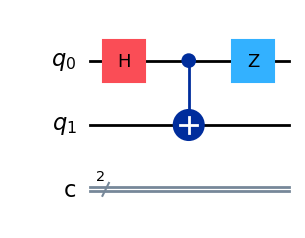

In [4]:
if a==1:
    qc.z(0)
qc.draw(output='mpl')

### 如果b==1, Alice对第一个qubit进行X变换，如果b==0, 不操作。

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$


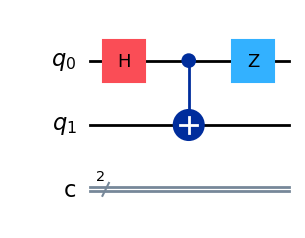

In [5]:
if b==1:
    qc.x(0)
qc.draw(output='mpl')

### Alice将第一个qubit发送给Bob, Bob对两个qubit进行CNOT操作

$$CNOT = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

### Bob再对第一个qubit进行H变换

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$


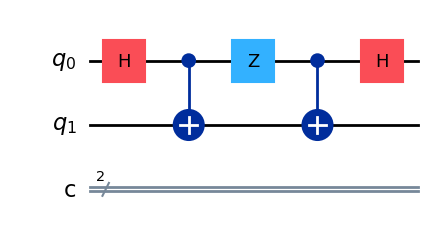

In [6]:
qc.cx(0, 1)
qc.h(0)
qc.draw(output='mpl')

### Bob测量两个qubits

In [7]:
qc.measure([0, 1], [0, 1])

### 执行这个电路

In [35]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

quasi_dists = Sampler().run(qc, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{1: 1.0}


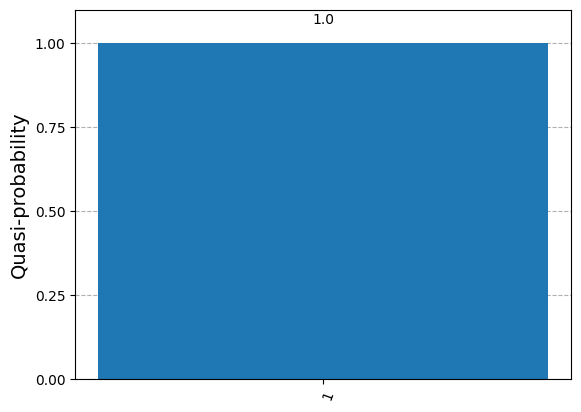

In [32]:
plot_histogram(quasi_dists)
